# XOR(퍼셉트론을 사용해서 해결)

## AND, OR, NAND

- w, b값을 내가 정함...

In [258]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

print(f'{AND(0,0)=}, {AND(0,1)=}, {AND(1,0)=}, {AND(1,1)=}')

# 입력, 출력
# 0, 0 -> 0
# 0, 1 -> 0
# 1, 0 -> 0
# 1, 1 -> 1

AND(0,0)=0, AND(0,1)=0, AND(1,0)=0, AND(1,1)=1


In [259]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1
    
print(f'{NAND(0,0)=}, {NAND(0,1)=}, {NAND(1,0)=}, {NAND(1,1)=}')

NAND(0,0)=1, NAND(0,1)=1, NAND(1,0)=1, NAND(1,1)=0


In [260]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1
    
print(f'{OR(0,0)=}, {OR(0,1)=}, {OR(1,0)=}, {OR(1,1)=}')

OR(0,0)=0, OR(0,1)=1, OR(1,0)=1, OR(1,1)=1


- 계층을 활용한 문제 해결 -> 여기까지 퍼셉트론

In [261]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
    
print(f'{XOR(0,0)=}, {XOR(0,1)=}, {XOR(1,0)=}, {XOR(1,1)=}')

XOR(0,0)=0, XOR(0,1)=1, XOR(1,0)=1, XOR(1,1)=0


In [262]:
print(f'AND: {AND(0,0)=}, {AND(0,1)=}, {AND(1,0)=}, {AND(1,1)=}')
print(f'NAND: {NAND(0,0)=}, {NAND(0,1)=}, {NAND(1,0)=}, {NAND(1,1)=}')
print(f'OR: {OR(0,0)=}, {OR(0,1)=}, {OR(1,0)=}, {OR(1,1)=}')
print(f'{XOR(0,0)=}, {XOR(0,1)=}, {XOR(1,0)=}, {XOR(1,1)=}')

AND: AND(0,0)=0, AND(0,1)=0, AND(1,0)=0, AND(1,1)=1
NAND: NAND(0,0)=1, NAND(0,1)=1, NAND(1,0)=1, NAND(1,1)=0
OR: OR(0,0)=0, OR(0,1)=1, OR(1,0)=1, OR(1,1)=1
XOR(0,0)=0, XOR(0,1)=1, XOR(1,0)=1, XOR(1,1)=0


## 시각적으로 확인하는 경사하강법

> 경사하강법 : 함수의 기울기를 이용해서 y의 값이 낮아지는 방향으로 점진적으로 이동하면서 최소값을 찾는 반복적인 최적화 (반복횟수를 줄일 수록 이득)

In [263]:
from chapter0 import *
import numpy as np

In [264]:
true_w = 2
true_b = 1
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N ,1) # epsilon은 노이즈
y = true_b + (true_w* x) + epsilon # 정답지

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

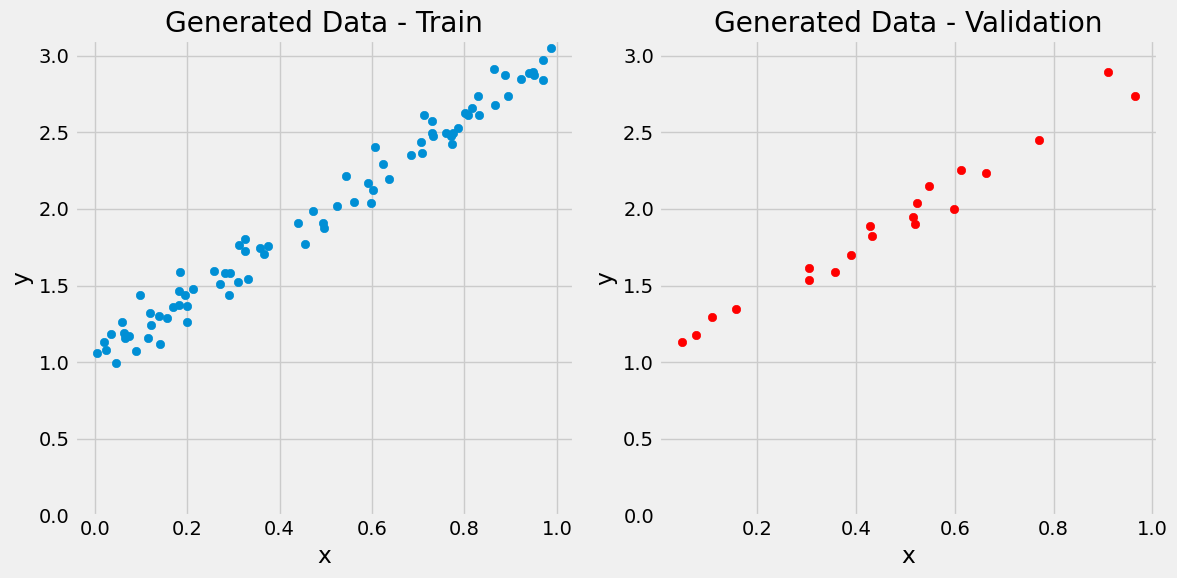

In [265]:
idx = np.arange(N)
np.random.shuffle(idx) # 인덱스를 섞고

train_idx = idx[: int(N * 0.8)] # split해서
val_idx = idx[int(N * 0.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

figure1(x_train, y_train, x_val, y_val) # 시각적으로 확인

## 경사하강법

### Step0. 무작위 초기화
> 딥러닝은 경사하강법 초기화하라고 했을 때 무조건 무작위로 하는 거임 (best)

In [266]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)

[0.49671415] [-0.1382643]


### Step1. 모델의 예측 계산

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

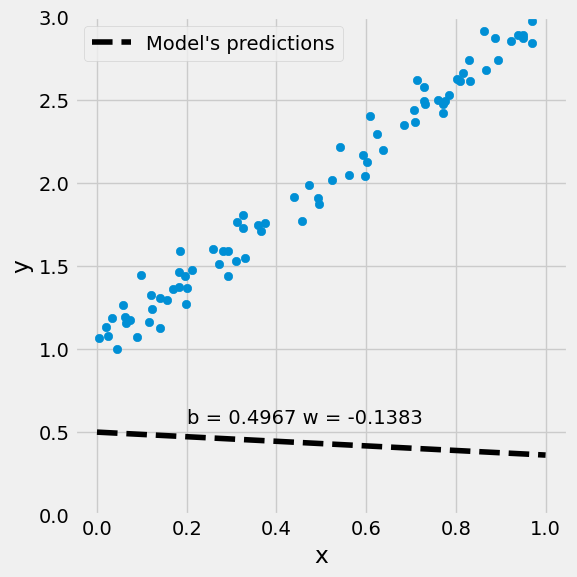

In [267]:
yhat = b + w* x_train
figure2(x_train, y_train, b, w)

### Step2. 손실계산

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

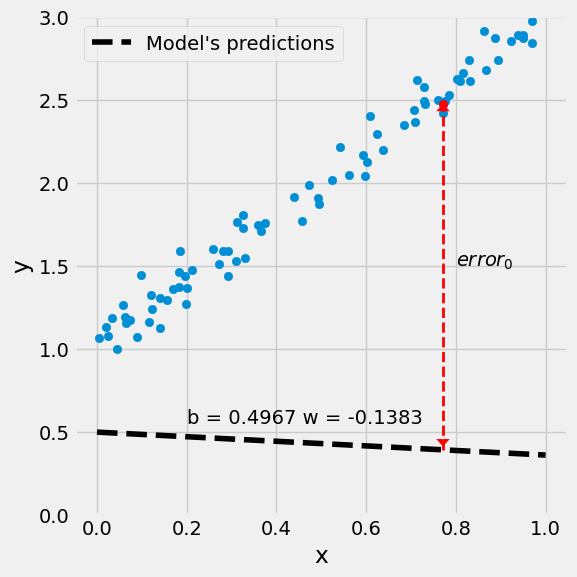

In [268]:
figure3(x_train, y_train, b, w)

In [269]:
error = yhat - y_train
loss = (error**2).mean()
print(loss)

2.7421577700550976


- 무작위로 초기화된 매개변수에 해당하는 손실값을 계산
- 손실을 어떻게 줄이죠? => 기울기를 어떻게 조정하죠? (w를 조정)

In [270]:
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
bs, ws = np.meshgrid(b_range, w_range)
print(bs.shape, ws.shape)

(101, 101) (101, 101)


In [271]:
sample_x = x_train[0]
sample_yhat = bs+ws*sample_x
sample_yhat.shape

(101, 101)

In [272]:
all_predictions = np.apply_along_axis(func1d=lambda x: bs + ws * x, axis=1, arr=x_train) # 반복문 쓰지 않음
all_predictions

array([[[-2.77127035, -2.71127035, -2.65127035, ...,  3.10872965,
          3.16872965,  3.22872965],
        [-2.72499413, -2.66499413, -2.60499413, ...,  3.15500587,
          3.21500587,  3.27500587],
        [-2.67871791, -2.61871791, -2.55871791, ...,  3.20128209,
          3.26128209,  3.32128209],
        ...,
        [ 1.76379929,  1.82379929,  1.88379929, ...,  7.64379929,
          7.70379929,  7.76379929],
        [ 1.81007551,  1.87007551,  1.93007551, ...,  7.69007551,
          7.75007551,  7.81007551],
        [ 1.85635173,  1.91635173,  1.97635173, ...,  7.73635173,
          7.79635173,  7.85635173]],

       [[-2.06355835, -2.00355835, -1.94355835, ...,  3.81644165,
          3.87644165,  3.93644165],
        [-2.05974485, -1.99974485, -1.93974485, ...,  3.82025515,
          3.88025515,  3.94025515],
        [-2.05593135, -1.99593135, -1.93593135, ...,  3.82406865,
          3.88406865,  3.94406865],
        ...,
        [-1.68983525, -1.62983525, -1.56983525, ...,  

(80, 1, 1)
(80, 101, 101)
(101, 101)


(<Figure size 1200x600 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

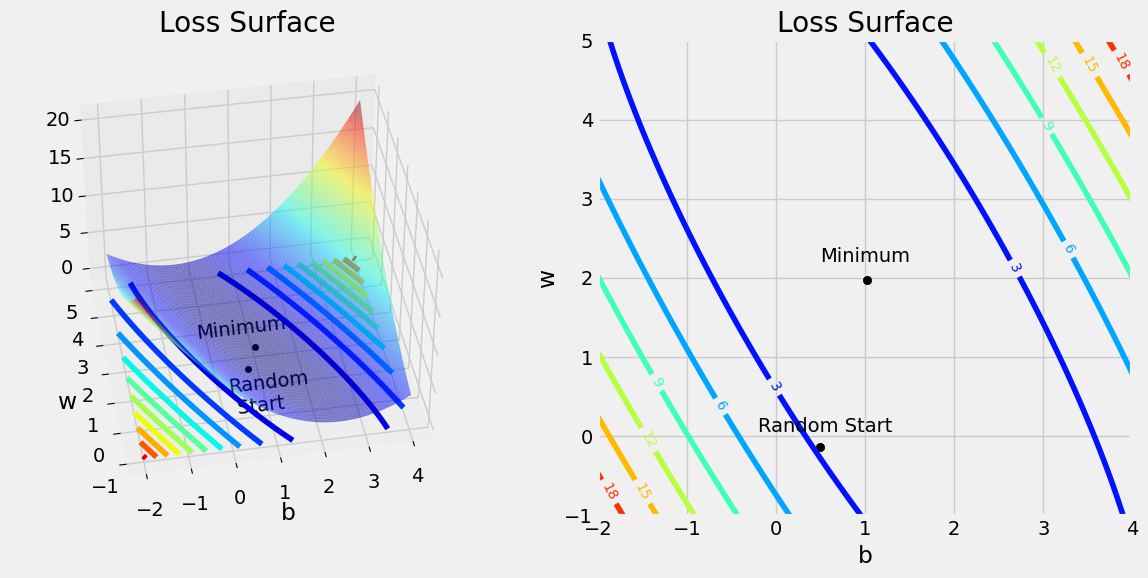

In [273]:
all_labels = y_train.reshape(-1, 1, 1)
print(all_labels.shape)
all_errors = all_predictions - all_labels
print(all_errors.shape)
all_losses = (all_errors**2).mean(axis=0)
print(all_losses.shape)
figure4(x_train, y_train, b, w, bs, ws, all_losses)

> bias때문에 미니멈으로 가지 못함
> 랜덤스타트는 저 구부러진 면에 있고 미니멈은 중간의 구부러진 면 위에 있음
> 따라서 저 구부러진 면을 위로 올리도록 피면 닿을지도

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

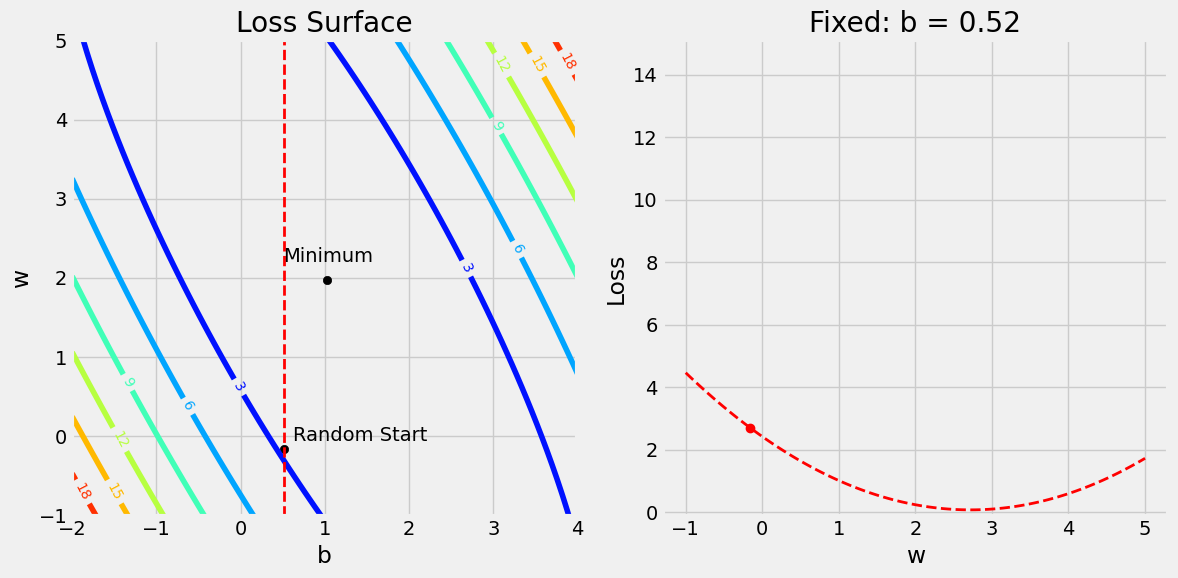

In [274]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

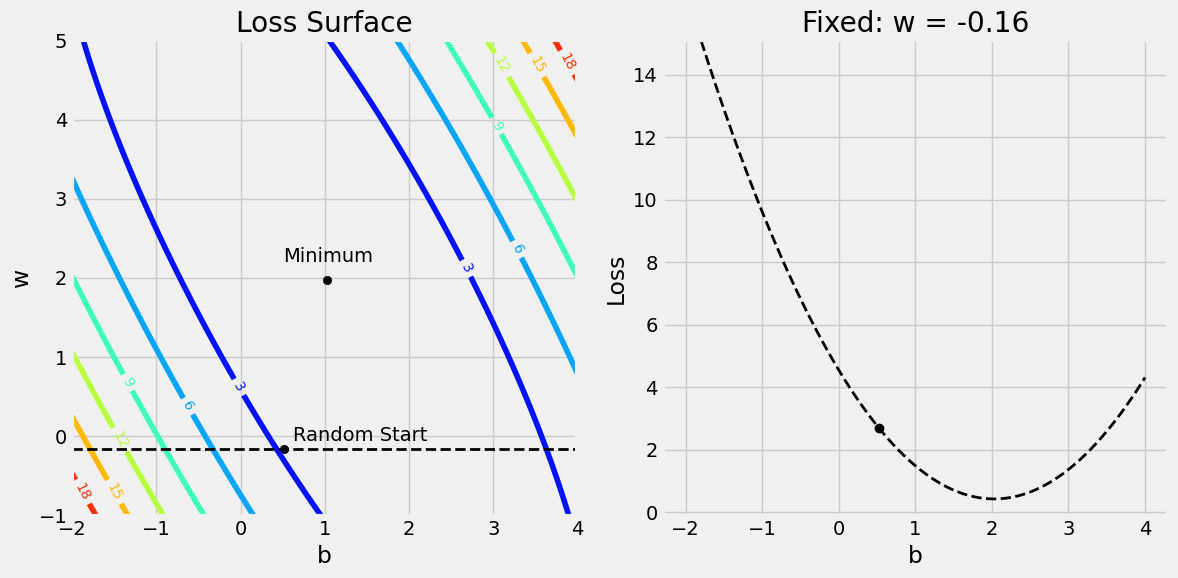

In [275]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

### Step3. 경사를 계산

In [276]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean() # 저 2를 편미분으로 뽑는다 생각각
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

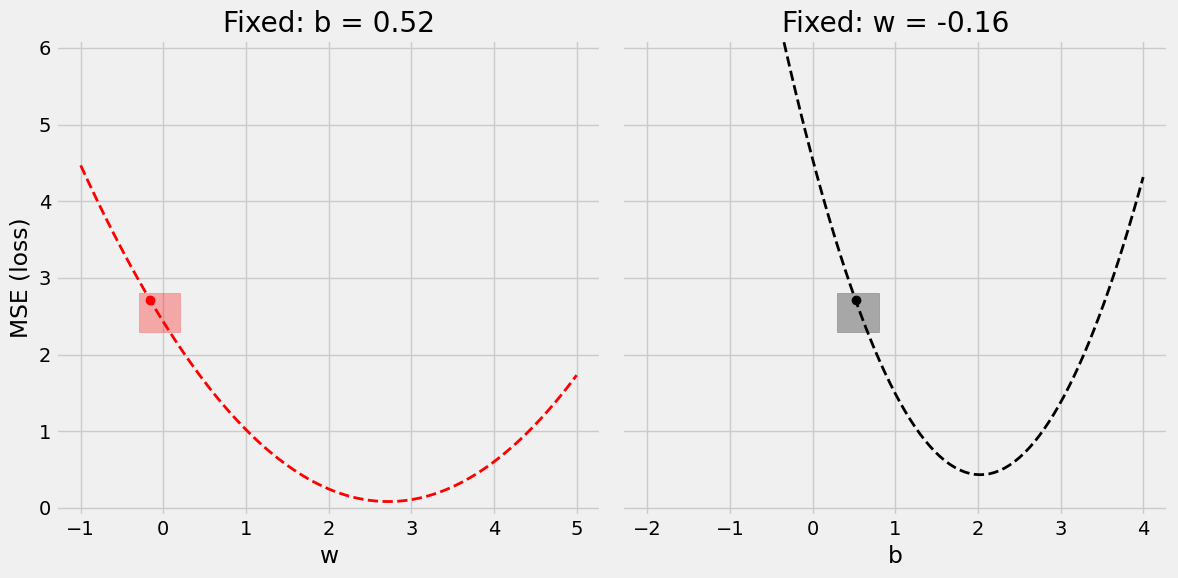

In [277]:
figure7(b, w, bs, ws, all_losses)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <Axes: title={'center': 'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

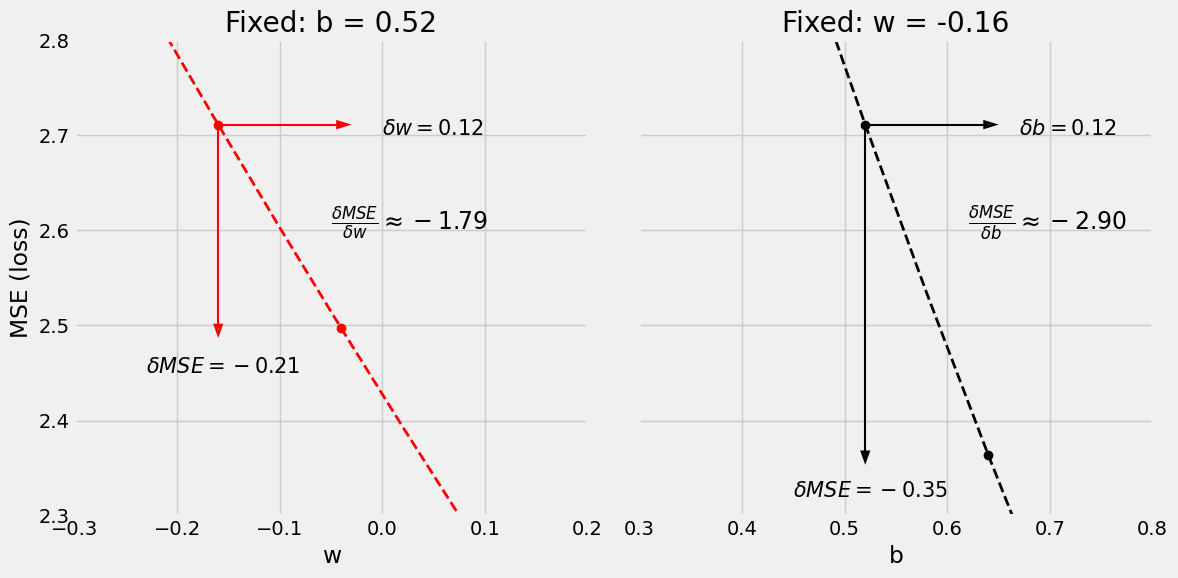

In [278]:
figure8(b, w, bs, ws, all_losses)

### Step4. 매개변수 조정

In [279]:
lr = 0.1 # 미분을 하는 횟수를 작게 할 수록 
print(b, w)

b = b - lr * b_grad
w = w - lr * w_grad
print(b,w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

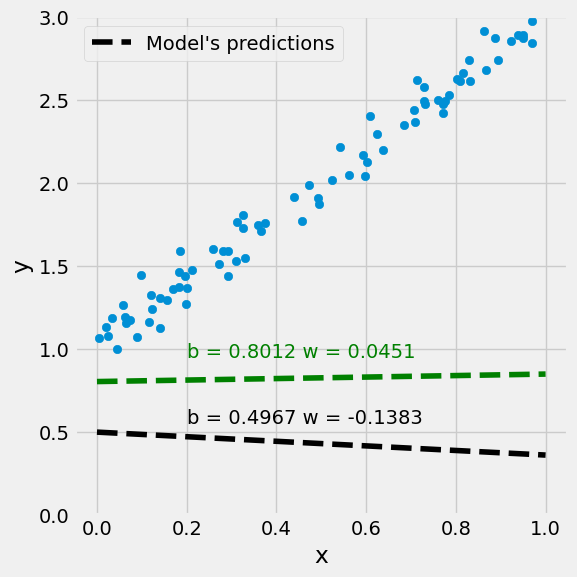

In [280]:
figure9(x_train, y_train, b, w)

### 반복(!!)

## 파이토치를 사용한 회귀

In [299]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn  as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

from sklearn.linear_model import LinearRegression

In [282]:
true_w = 2
true_b = 1
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N ,1) # epsilon은 노이즈
y = true_b + (true_w* x) + epsilon # 정답지

In [283]:
idx = np.arange(N)
np.random.shuffle(idx) # 인덱스를 섞고

train_idx = idx[: int(N * 0.8)] # split해서
val_idx = idx[int(N * 0.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

## numpy

In [284]:
# 무작위
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
    # 1단계 : 순전파
    yhat = b + w * x_train
    # 2단계 : 손실계산
    error = yhat - y_train
    # MSE
    loss = (error**2).mean()
    # 3단계 : 기울기 계산
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    # 4단계 : 업데이트 (3, 4단계를 역전파라고 함)
    b = b - lr * b_grad
    w = w - lr * w_grad
print(b, w)

[1.02354094] [1.96896411]


## scikit-learn

In [285]:
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


## pytorch

- 텐서
    - 숫자 : 스칼라
    - 배열 : 텐서
- 옵티마이저
    - 최적화 함수
- 모델

In [286]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [287]:
scalar = torch.tensor(3.14)
vector = torch.tensor([1,2,3])
matrix = torch.ones((2,3), dtype=torch.int)
tensor = torch.randn((2,3,4), dtype=torch.float) # shape 읽는 거 중요
print(f"{scalar}, \n{vector}, \n{matrix}, \n{tensor}")
print(tensor.size(), tensor.shape)
print(scalar.size(), scalar.shape) # torch.Size([]) == "scalar야" // torch.Size([1]) == "tensor야"

3.140000104904175, 
tensor([1, 2, 3]), 
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32), 
tensor([[[ 0.6784, -1.2345, -0.0431, -1.6047],
         [ 1.7878, -0.4780, -0.2429, -0.9342],
         [-1.1109,  0.0915, -2.3169, -0.2168]],

        [[-1.3847, -0.8712, -0.2234,  1.7174],
         [-0.5920, -0.0631, -0.8286,  0.3309],
         [-1.5576,  0.9956, -0.8798, -0.6011]]])
torch.Size([2, 3, 4]) torch.Size([2, 3, 4])
torch.Size([]) torch.Size([])


In [288]:
# same_matrix = matrix.view(1,6) # 원본이랑 연동됨
same_matrix = matrix.view(1,6).clone().detach() # .detach() : 기울기값은 빼서 복사해줘
same_matrix[0,1] = 2.0

print(matrix)
print(same_matrix)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
tensor([[1, 2, 1, 1, 1, 1]], dtype=torch.int32)


In [289]:
x_train, y_train, x_val, y_val

(array([[0.77127035],
        [0.06355835],
        [0.86310343],
        [0.02541913],
        [0.73199394],
        [0.07404465],
        [0.19871568],
        [0.31098232],
        [0.47221493],
        [0.96958463],
        [0.12203823],
        [0.77513282],
        [0.80219698],
        [0.72960618],
        [0.09767211],
        [0.18485446],
        [0.15601864],
        [0.02058449],
        [0.98688694],
        [0.62329813],
        [0.70807258],
        [0.59789998],
        [0.92187424],
        [0.63755747],
        [0.28093451],
        [0.25877998],
        [0.11959425],
        [0.72900717],
        [0.94888554],
        [0.60754485],
        [0.5612772 ],
        [0.4937956 ],
        [0.18182497],
        [0.27134903],
        [0.96990985],
        [0.21233911],
        [0.18340451],
        [0.86617615],
        [0.37454012],
        [0.29122914],
        [0.80839735],
        [0.05808361],
        [0.83244264],
        [0.54269608],
        [0.77224477],
        [0

In [294]:
x_train_tensor = torch.as_tensor(x_train).float().to(device) # numpy를 tensor로
y_train_tensor = torch.as_tensor(y_train).float().to(device) # numpy를 tensor로

In [295]:
# -- GD --
# lr = 0.1

# # np를 안 쓸거야가 아니라 torch로 바꿀 수 있는지 확인
# torch.manual_seed(42)
# b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device) # requires_grad=True 기울기 계산을 하기 위해
# w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# n_epochs = 1000

# for epoch in range(n_epochs):
#     yhat = b + w * x_train_tensor
#     error = yhat - y_train_tensor
#     loss = (error**2).mean()
#     loss.backward() # loss를 최소로 하는 편미분을 함
#     with torch.no_grad(): # 자동 미분을 멈춤
#         b -= lr * b.grad  # 매개변수 업데이트 => 기울기
#         w -= lr * w.grad
#     b.grad.zero_() # 이걸 안 하면 기울기 누적됨
#     w.grad.zero_() # 이걸 해서 기울기를 다시 초기화
# print(b, w)

- device 조심하기 (모델과 x_train_tensor...)

In [ ]:
x_train_tensor = torch.as_tensor(x_train).float().to(device) # numpy를 tensor로
y_train_tensor = torch.as_tensor(y_train).float().to(device) # numpy를 tensor로
lr = 0.1

# np를 안 쓸거야가 아니라 torch로 바꿀 수 있는지 확인
torch.manual_seed(42)

model = nn.Sequential(nn.Linear(1,1)).to(device=device) # Linear(1,1) : 입력도 1개 출력도 1개
optimizer = optim.SGD(model.parameters(), lr=lr) # 1
loss_fn = nn.MSELoss(reduction="mean") # 2
# 1, 2 => 딥러닝에서는 이것들을 hyperparameter로 봄 (중요)

n_epochs = 1000

for epoch in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward() # loss를 최소로 하는 편미분을 함
    optimizer.step()
    optimizer.zero_grad()
print(b, w)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


## 파이토치

In [ ]:
true_w = 2
true_b = 1
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N ,1) # epsilon은 노이즈
y = true_b + (true_w* x) + epsilon # 정답지

idx = np.arange(N)
np.random.shuffle(idx) # 인덱스를 섞고

train_idx = idx[: int(N * 0.8)] # split해서
val_idx = idx[int(N * 0.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

x_train_tensor = torch.as_tensor(x_train).float().to(device) # numpy를 tensor로
y_train_tensor = torch.as_tensor(y_train).float().to(device) # numpy를 tensor로
lr = 0.1

# np를 안 쓸거야가 아니라 torch로 바꿀 수 있는지 확인
torch.manual_seed(42)

model = nn.Sequential(nn.Linear(1,1)).to(device=device) # Linear(1,1) : 입력도 1개 출력도 1개
optimizer = optim.SGD(model.parameters(), lr=lr) # 1
loss_fn = nn.MSELoss(reduction="mean") # 2
# 1, 2 => 딥러닝에서는 이것들을 hyperparameter로 봄 (중요)

n_epochs = 1000

for epoch in range(n_epochs):
    model.train()
    yhat = model(x_train_tensor)
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward() # loss를 최소로 하는 편미분을 함
    optimizer.step()
    optimizer.zero_grad()
print(model.state_dict())
